In [1]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import sqlite3
from flask import jsonify
import json
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read csv & clean data
lifecsv = pd.read_csv("Life Expectancy (years) by Country.csv", encoding='latin1')

lifecsv = lifecsv.drop(columns=['Series Name','Series Code'])

lifecsv = lifecsv.rename(columns={'1999 [YR1999]':'1999','2000 [YR2000]':'2000','2001 [YR2001]':'2001','2002 [YR2002]':'2002','2003 [YR2003]':'2003','2004 [YR2004]':'2004','2005 [YR2005]':'2005','2006 [YR2006]':'2006','2007 [YR2007]':'2007','2008 [YR2008]':'2008','2009 [YR2009]':'2009','2010 [YR2010]':'2010','2011 [YR2011]':'2011','2012 [YR2012]':'2012','2013 [YR2013]':'2013','2014 [YR2014]':'2014','2015 [YR2015]':'2015','2016 [YR2016]':'2016','2017 [YR2017]':'2017'})

lifecsv = lifecsv.dropna()

In [3]:
lifecsv.head()

,Country Name,Country Code,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,54.959,55.482,56.044,56.637,57.25,57.875,58.5,59.11,...,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673,64.047
1,Albania,ALB,73.588,73.955,74.286,74.575,74.82,75.028,75.217,75.418,...,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345,78.495
2,Algeria,DZA,69.822,70.292,70.778,71.276,71.78,72.281,72.767,73.225,...,74.032,74.374,74.676,74.944,75.187,75.418,75.641,75.86,76.078,76.293
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [4]:
engine = create_engine("sqlite:///life.sqlite")
conn = engine.connect()

In [5]:
# lifecsv.to_sql(name='life', con=engine, if_exists='replace', index=True)

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['life']

In [7]:
data = pd.read_sql("SELECT * FROM life", conn)
data.head()

,id,Country_Name,Country_Code,Yr1999,Yr2000,Yr2001,Yr2002,Yr2003,Yr2004,Yr2005,...,Yr2008,Yr2009,Yr2010,Yr2011,Yr2012,Yr2013,Yr2014,Yr2015,Yr2016,Yr2017
0,0,Afghanistan,AFG,54.959,55.482,56.044,56.637,57.25,57.875,58.5,...,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673,64.047
1,1,Albania,ALB,73.588,73.955,74.286,74.575,74.82,75.028,75.217,...,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345,78.495
2,2,Algeria,DZA,69.822,70.292,70.778,71.276,71.78,72.281,72.767,...,74.032,74.374,74.676,74.944,75.187,75.418,75.641,75.86,76.078,76.293
3,3,American Samoa,ASM,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,4,Andorra,AND,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [8]:
engine = create_engine("sqlite:///life.sqlite")
session = Session(engine)

In [9]:
Base = automap_base()

In [10]:
Base.prepare(engine, reflect=True)

In [11]:
Base.classes.keys()

['life']

In [12]:
columns = inspector.get_columns('life')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
Country_Name TEXT
Country_Code TEXT
Yr1999 FLOAT
Yr2000 FLOAT
Yr2001 FLOAT
Yr2002 FLOAT
Yr2003 FLOAT
Yr2004 FLOAT
Yr2005 FLOAT
Yr2006 FLOAT
Yr2007 FLOAT
Yr2008 FLOAT
Yr2009 FLOAT
Yr2010 FLOAT
Yr2011 FLOAT
Yr2012 FLOAT
Yr2013 FLOAT
Yr2014 FLOAT
Yr2015 FLOAT
Yr2016 FLOAT
Yr2017 FLOAT


In [13]:
Life = Base.classes.life

In [14]:
first_row = session.query(Life).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2172efe3470>,
 'Yr2009': 60.754,
 'Yr2001': 56.044,
 'Yr2017': 64.047,
 'Yr2010': 61.226,
 'Yr2002': 56.637,
 'Yr2011': 61.666,
 'id': 0,
 'Yr2003': 57.25,
 'Yr2012': 62.086,
 'Yr2004': 57.875,
 'Yr2013': 62.494,
 'Country_Code': 'AFG',
 'Yr2005': 58.5,
 'Country_Name': 'Afghanistan',
 'Yr2014': 62.895,
 'Yr2006': 59.11,
 'Yr1999': 54.959,
 'Yr2015': 63.288,
 'Yr2007': 59.694,
 'Yr2000': 55.482,
 'Yr2016': 63.673,
 'Yr2008': 60.243}

In [15]:
for row in session.query(Life.Country_Name, Life.Yr1999, Life.Yr2017).limit(15).all():
    print(row)

('Afghanistan', 54.959, 64.047)
('Albania', 73.588, 78.495)
('Algeria', 69.822, 76.293)
('American Samoa', '..', '..')
('Andorra', '..', '..')
('Angola', 46.105, 61.809)
('Antigua and Barbuda', 73.327, 76.519)
('Argentina', 73.618, 76.738)
('Armenia', 70.944, 74.782)
('Aruba', 73.738, 76.01)
('Australia', 78.93170732, 82.49756098)
('Austria', 77.87560976, 81.64146341)
('Azerbaijan', 66.491, 72.123)
('Bahamas, The', 72.093, 75.823)
('Bahrain', 74.239, 77.038)


In [16]:
results = session.query(Life.Country_Name, Life.Country_Code, Life.Yr1999, Life.Yr2000,Life.Yr2001,Life.Yr2002,Life.Yr2003,Life.Yr2004,Life.Yr2005,Life.Yr2006,Life.Yr2007,Life.Yr2008,Life.Yr2009,Life.Yr2010,Life.Yr2011,Life.Yr2012,Life.Yr2013,Life.Yr2014,Life.Yr2015,Life.Yr2016,Life.Yr2017).all()

country_data = []
for name, code, y99, y00, y01, y02, y03, y04, y05, y06,y07,y08,y09,y10,y11,y12,y13,y14,y15,y16,y17 in results:
    country_dict = {}
    country_dict['Country Name'] = name
    country_dict['Country Code'] = code
    country_dict['1999'] = y99
    country_dict['2000'] = y00
    country_dict['2001'] = y01
    country_dict['2002'] = y02
    country_dict['2003'] = y03
    country_dict['2004'] = y04
    country_dict['2005'] = y05
    country_dict['2006'] = y06
    country_dict['2007'] = y07
    country_dict['2008'] = y08
    country_dict['2009'] = y09
    country_dict['2010'] = y10
    country_dict['2011'] = y11
    country_dict['2012'] = y12
    country_dict['2013'] = y13
    country_dict['2014'] = y14
    country_dict['2015'] = y15
    country_dict['2016'] = y16
    country_dict['2017'] = y17
    country_data.append(country_dict)

In [17]:
country_codes = []
for row in data['Country_Code']:
    country_codes.append(row)
country_codes

['AFG',
 'ALB',
 'DZA',
 'ASM',
 'AND',
 'AGO',
 'ATG',
 'ARG',
 'ARM',
 'ABW',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BHR',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BOL',
 'BIH',
 'BWA',
 'BRA',
 'VGB',
 'BRN',
 'BGR',
 'BFA',
 'BDI',
 'CPV',
 'KHM',
 'CMR',
 'CAN',
 'CYM',
 'CAF',
 'TCD',
 'CHI',
 'CHL',
 'CHN',
 'COL',
 'COM',
 'COD',
 'COG',
 'CRI',
 'CIV',
 'HRV',
 'CUB',
 'CUW',
 'CYP',
 'CZE',
 'DNK',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'GNQ',
 'ERI',
 'EST',
 'SWZ',
 'ETH',
 'FRO',
 'FJI',
 'FIN',
 'FRA',
 'PYF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GIB',
 'GRC',
 'GRL',
 'GRD',
 'GUM',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND',
 'HKG',
 'HUN',
 'ISL',
 'IND',
 'IDN',
 'IRN',
 'IRQ',
 'IRL',
 'IMN',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'JOR',
 'KAZ',
 'KEN',
 'KIR',
 'PRK',
 'KOR',
 'XKX',
 'KWT',
 'KGZ',
 'LAO',
 'LVA',
 'LBN',
 'LSO',
 'LBR',
 'LBY',
 'LIE',
 'LTU',
 'LUX',
 'MAC',
 'MDG',
 'MWI',
 'MYS',
 'MDV',
 'MLI',
 'MLT',
 'MHL',


In [18]:
country_names = []
for row in data['Country_Name']:
    country_names.append(row)
country_names

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',

In [19]:
count = 0

income_list = []

for code in country_codes:
    country_code = code
    url = 'http://api.worldbank.org/v2/country/'+ country_code + '?format=json'
    response = requests.get(url).json()
    income_dict = {}
    income_dict['Country_Name'] = country_names[count]
    if response[1][0]['incomeLevel']['value'] != 'Aggregates':
        income_dict['Income_Level'] = response[1][0]['incomeLevel']['value']
        income_list.append(income_dict)
    count +=1
    
income_list
    
   

[{'Country_Name': 'Afghanistan', 'Income_Level': 'Low income'},
 {'Country_Name': 'Albania', 'Income_Level': 'Upper middle income'},
 {'Country_Name': 'Algeria', 'Income_Level': 'Upper middle income'},
 {'Country_Name': 'American Samoa', 'Income_Level': 'Upper middle income'},
 {'Country_Name': 'Andorra', 'Income_Level': 'High income'},
 {'Country_Name': 'Angola', 'Income_Level': 'Lower middle income'},
 {'Country_Name': 'Antigua and Barbuda', 'Income_Level': 'High income'},
 {'Country_Name': 'Argentina', 'Income_Level': 'High income'},
 {'Country_Name': 'Armenia', 'Income_Level': 'Upper middle income'},
 {'Country_Name': 'Aruba', 'Income_Level': 'High income'},
 {'Country_Name': 'Australia', 'Income_Level': 'High income'},
 {'Country_Name': 'Austria', 'Income_Level': 'High income'},
 {'Country_Name': 'Azerbaijan', 'Income_Level': 'Upper middle income'},
 {'Country_Name': 'Bahamas, The', 'Income_Level': 'High income'},
 {'Country_Name': 'Bahrain', 'Income_Level': 'High income'},
 {'Cou

In [21]:
results = session.query(Life.Country_Name, Life.Yr2017).all()
results

[('Afghanistan', 64.047),
 ('Albania', 78.495),
 ('Algeria', 76.293),
 ('American Samoa', '..'),
 ('Andorra', '..'),
 ('Angola', 61.809),
 ('Antigua and Barbuda', 76.519),
 ('Argentina', 76.738),
 ('Armenia', 74.782),
 ('Aruba', 76.01),
 ('Australia', 82.49756098),
 ('Austria', 81.64146341),
 ('Azerbaijan', 72.123),
 ('Bahamas, The', 75.823),
 ('Bahrain', 77.038),
 ('Bangladesh', 72.808),
 ('Barbados', 76.057),
 ('Belarus', 74.12926829),
 ('Belgium', 81.43902439),
 ('Belize', 70.588),
 ('Benin', 61.171),
 ('Bermuda', 81.44195122),
 ('Bhutan', 70.565),
 ('Bolivia', 69.473),
 ('Bosnia and Herzegovina', 77.087),
 ('Botswana', 67.618),
 ('Brazil', 75.723),
 ('British Virgin Islands', '..'),
 ('Brunei Darussalam', 77.374),
 ('Bulgaria', 74.81219512),
 ('Burkina Faso', 60.77),
 ('Burundi', 57.857),
 ('Cabo Verde', 73.004),
 ('Cambodia', 69.331),
 ('Cameroon', 58.575),
 ('Canada', 82.4704878),
 ('Cayman Islands', '..'),
 ('Central African Republic', 52.89),
 ('Chad', 53.208),
 ('Channel Islan

In [36]:
countries = []
income = []
life2017 = []


count = 0
for country in income_list:
    
    if country['Country_Name'] == results[count][0]:
        countries.append(country['Country_Name'])
        income.append(country['Income_Level'])
        life2017.append(results[count][1])
        count +=1
        

In [37]:
life2017_df = pd.DataFrame({'Countries': countries, 'Income_Level': income, 'Life_Expectancy_2017': life2017})

In [38]:
life2017_df.head()

,Countries,Income_Level,Life_Expectancy_2017
0,Afghanistan,Low income,64.047
1,Albania,Upper middle income,78.495
2,Algeria,Upper middle income,76.293
3,American Samoa,Upper middle income,..
4,Andorra,High income,..


In [40]:
life2017_df = life2017_df.drop(life2017_df[life2017_df['Life_Expectancy_2017'] == ".."].index)
life2017_df.head()

,Countries,Income_Level,Life_Expectancy_2017
0,Afghanistan,Low income,64.047
1,Albania,Upper middle income,78.495
2,Algeria,Upper middle income,76.293
5,Angola,Lower middle income,61.809
6,Antigua and Barbuda,High income,76.519


In [73]:
LIC = life2017_df[life2017_df['Income_Level'] == 'Low income']
LMC = life2017_df[life2017_df['Income_Level'] == 'Lower middle income']
UMC = life2017_df[life2017_df['Income_Level'] == 'Upper middle income']
HIC = life2017_df[life2017_df['Income_Level'] == 'High income']

In [78]:
lower = life2017_df[life2017_df['Income_Level'] != 'Upper middle income']
lower = lower[lower['Income_Level'] != 'High income'].Life_Expectancy_2017

In [79]:
higher = life2017_df[life2017_df['Income_Level'] != 'Lower middle income']
higher = higher[higher['Income_Level'] != 'Low income'].Life_Expectancy_2017

Is Life Expectancy Statistically Significantly Different Between Higher Income Countries and Lower Income Countries?

Our null hypothesis is that lower income countries have a larger or equal average life expectancy to the life expectancy of higher income countries.

The alternative, what we want to prove as true, is that higher income countries have a longer life expectancy than lower income countries.

In [80]:
observed_diff = np.mean(higher) - np.mean(lower)
observed_diff

11.316506149844159

Our observed difference tells us that high income countries live an average of 11.32 years longer than countries with low income. Is this statistically significant though?

In [101]:
#Bootstrapping

diffs = [] #create placeholder for calculations

for i in range(10000): #run for 10000 iterations
    low_life_sample = np.mean(lower.sample(5, replace = True)) #take sample of 5 lower income countries and compute the mean
    high_life_sample = np.mean(higher.sample(5, replace = True))#take sample of 5 of higher income countries and compute the mean
    
    differences = high_life_sample - low_life_sample #compute differences in our random samples
    diffs.append(differences) #add to our list

P-Value =  0.0008


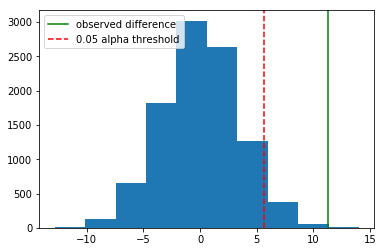

In [103]:

simulation = np.random.normal(0, np.std(diffs), 10000) #creates normal distribution of our simulated differences. Must include the standard deviation as 2nd argument. 10000 represents the total samples we computed differences on
plt.hist(simulation)#plot hist of simulated normal distribution
plt.axvline(observed_diff, color = 'green', linestyle = '-')#plots our original observed difference from our dataset
plt.axvline(np.percentile(simulation, 95), color='red', linestyle = '--')#plots the alpha threshold being 0.05% in our case. This can also be thought of as the 95% confidence interval
plt.legend(['observed difference', '0.05 alpha threshold',])#plot legend
plt.savefig("Significance.png")
print("P-Value = ",  (simulation > observed_diff).mean()) #compute p-value by calculating how much total volume of our distribution falls above our observed difference.

Given our P-Value of 0.0008 we reject the null hypothesis and conclude that life expectancy is infact statisitcally significantly different in high income countries than lower income countries. Now we can say with statisitical certainty that our hypothesis that higher income leads to higher life expectancy is correct.